In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
N_regimes = 3
start_time = None

In [3]:
kor = pd.read_csv('korindex 1970_2022.csv', index_col=0, parse_dates=True ) #인덱스 불러오기
usa = pd.read_csv('Composite leading indicator.csv', index_col=0, parse_dates=True )

In [4]:
#normalize
kor['value'] =( kor['value'] - kor['value'].mean() ) / kor['value'].std()
usa['value'] =( usa['value'] - usa['value'].mean() ) / usa['value'].std()
print(kor)
print(usa)

               value
time                
1970-01-01  0.318026
1970-02-01  0.278360
1970-03-01  0.199026
1970-04-01  0.159360
1970-05-01  0.080027
...              ...
2022-01-01 -0.078639
2022-02-01 -0.197639
2022-03-01 -0.276972
2022-04-01 -0.395972
2022-05-01 -0.356305

[629 rows x 1 columns]
               value
time                
1955-01-01  0.992076
1955-02-01  1.228729
1955-03-01  1.424447
1955-04-01  1.561836
1955-05-01  1.640568
...              ...
2022-02-01 -0.023885
2022-03-01 -0.115048
2022-04-01 -0.210998
2022-05-01 -0.313676
2022-06-01 -0.416662

[810 rows x 1 columns]


<AxesSubplot:title={'center':'Korea Leading indicator'}, xlabel='time'>

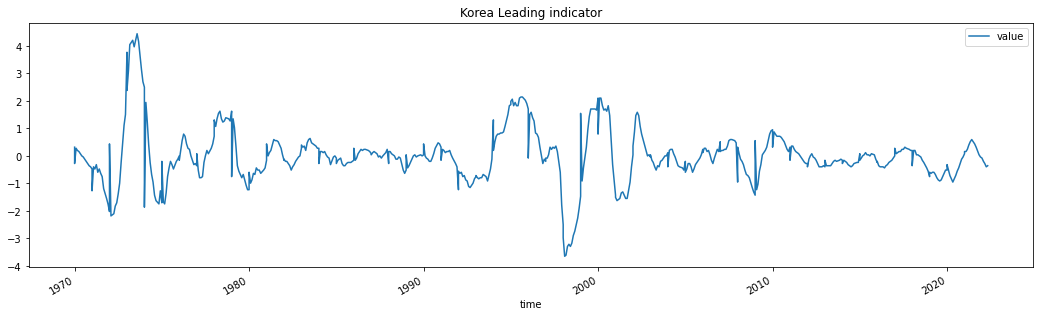

In [5]:
kor.plot(title='Korea Leading indicator', figsize=(18, 5)) 

<AxesSubplot:title={'center':'USA Leading indicator'}, xlabel='time'>

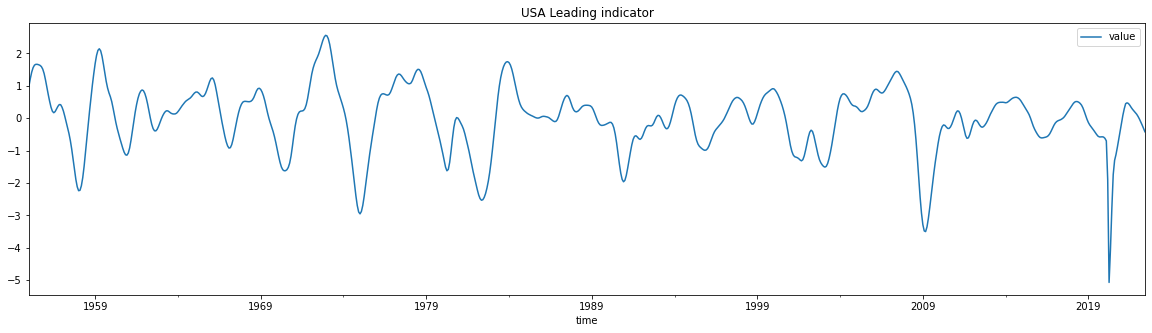

In [6]:
usa.plot(title='USA Leading indicator', figsize=(20, 5)) 

In [7]:
#Korea 부터

In [8]:
kor_model = sm.tsa.MarkovRegression(kor.dropna(), k_regimes=N_regimes, trend='nc', switching_variance=True)
kor_model_fit = kor_model.fit()
kor_model_fit.summary()

C:\Users\owjet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\owjet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'


<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:                  value   No. Observations:                  629
Model:               MarkovRegression   Log Likelihood                -531.715
Date:                Tue, 26 Jul 2022   AIC                           1081.430
Time:                        01:10:17   BIC                           1121.427
Sample:                             0   HQIC                          1096.967
                                - 629                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0508      0.006      7.872      0.000       0.038       0.063
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.4165      0.062      6.703      0.000       0.295       0.538
                             Regime 2 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         3.8865      0.501      7.754      0.000       2.904       4.869
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.9527   6.77e-05   1.41e+04      0.000       0.953       0.953
p[1->0]        0.0733      0.023      3.191      0.001       0.028       0.118
p[2->0]     8.832e-22        nan        nan        nan         nan         nan
p[0->1]        0.0473   2.19e-05   2157.265      0.000       0.047       0.047
p[1->1]        0.9034      0.026     34.184      0.000       0.852       0.955
p[2->1]        0.0368      0.018      2.087      0.037       0.002       0.071
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

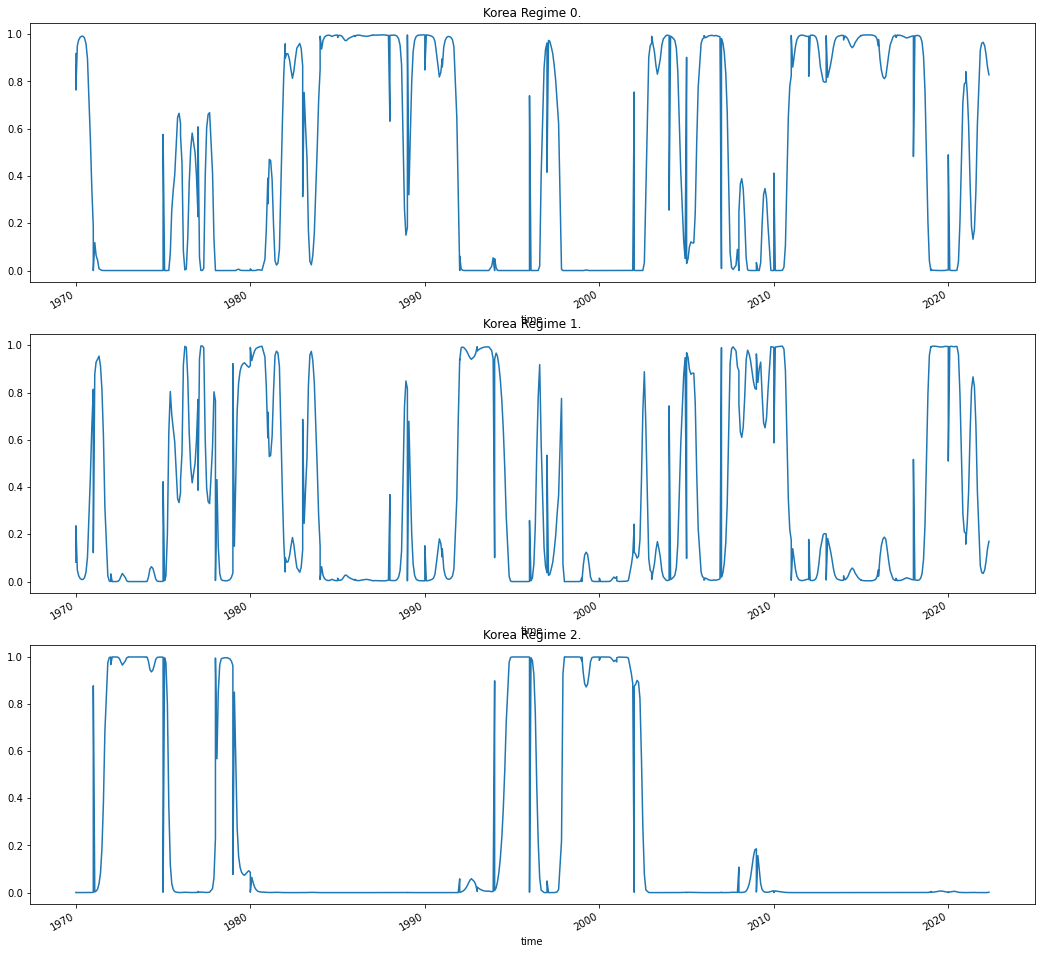

In [9]:
for i in range(N_regimes):
    plt.subplot(N_regimes, 1, i+1)                # nrows=2, ncols=1, 
    kor_model_fit.smoothed_marginal_probabilities[i].plot(title='Korea Regime {}.'.format(i), figsize=(18, 18))


In [10]:
#USA

In [11]:
usa_model = sm.tsa.MarkovRegression(usa.dropna(), k_regimes=N_regimes, trend='nc', switching_variance=True)
usa_model_fit = usa_model.fit()
usa_model_fit.summary()


C:\Users\owjet\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:                  value   No. Observations:                  810
Model:               MarkovRegression   Log Likelihood                -887.382
Date:                Tue, 26 Jul 2022   AIC                           1792.763
Time:                        01:10:21   BIC                           1835.037
Sample:                    01-01-1955   HQIC                          1808.993
                         - 06-01-2022                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0364      0.008      4.683      0.000       0.021       0.052
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.3464      0.042      8.209      0.000       0.264       0.429
                             Regime 2 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         2.6873      0.284      9.454      0.000       2.130       3.244
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.8995      0.000   6434.895      0.000       0.899       0.900
p[1->0]        0.0470      0.015      3.225      0.001       0.018       0.076
p[2->0]     5.646e-14        nan        nan        nan         nan         nan
p[0->1]        0.1005   4.67e-05   2150.826      0.000       0.100       0.101
p[1->1]        0.9091      0.020     45.360      0.000       0.870       0.948
p[2->1]        0.0663      0.018      3.582      0.000       0.030       0.103
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

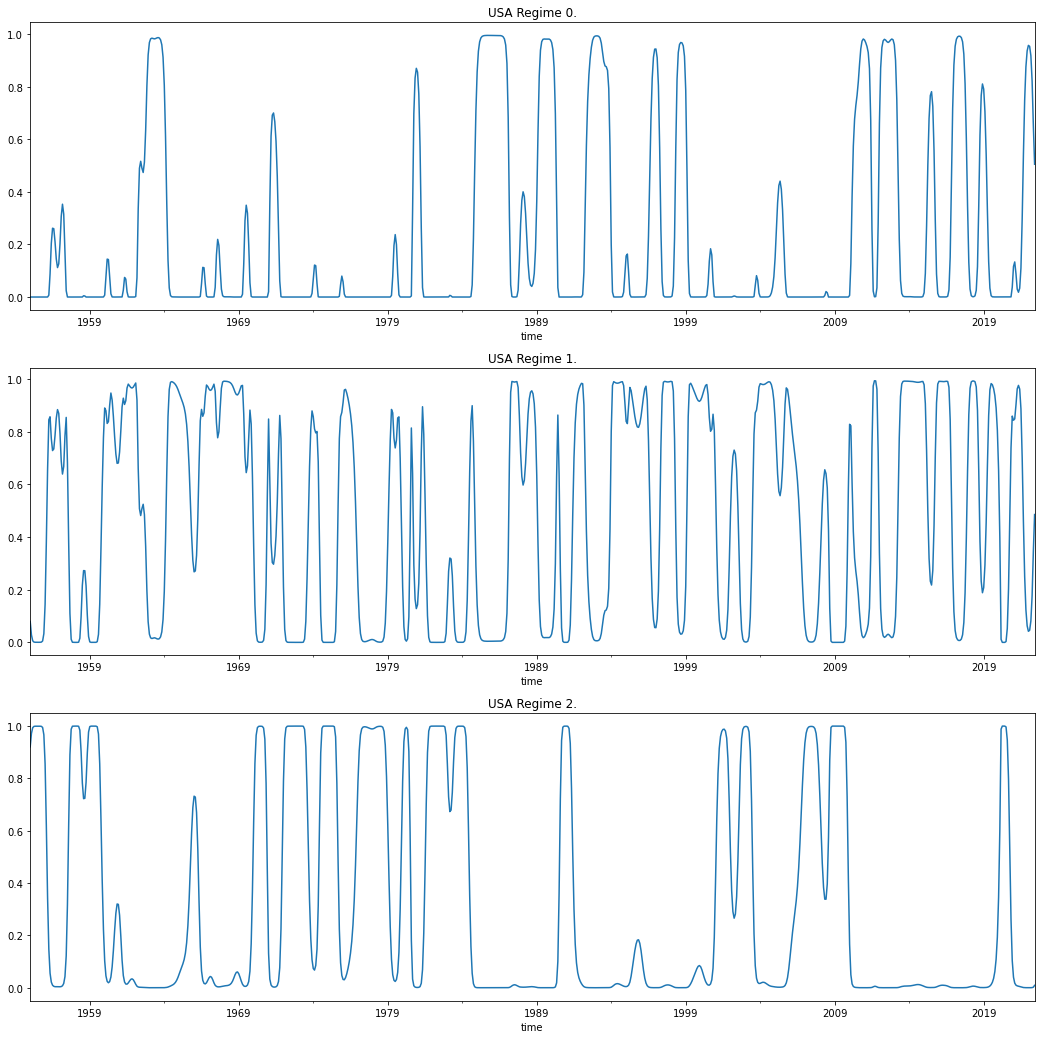

In [12]:
for i in range(N_regimes):
    plt.subplot(N_regimes, 1, i+1)               
    usa_model_fit.smoothed_marginal_probabilities[i].plot(title='USA Regime {}.'.format(i), figsize=(18, 18))